<a href="https://colab.research.google.com/github/Eben-Success/004-MNIST_Keras/blob/main/MNIST_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [25]:
# load the Fashio MNIST dataset
fmist = tf.keras.datasets.fashion_mnist

In [26]:
# Load the training and test split of the Fashion MNISt datasets
(training_images, training_labels), (test_images, test_labels) = fmist.load_data()

LABEL: 1
  
IMAGE PIXEL ARRAY: 
 [[  0   0   0   0   0   0   0   0   0  58 145 106 111  52  83 127 106 101 146  23   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  97 161 175 178 182 230 254 159 127 143  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 106 172 154 128 163 254 170 156 182 135  68   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 120 109 111 117 139 104 123 113 119 160 115   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 130 134 143 156 165 126 164 128  98 116 119   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 128 124 122 143 190 234 168 130 120 132 120   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 137 111 124 142 250 246 156 142 124 128 130   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 128 146 123 174 191 123 167 128 127 143 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 138 1

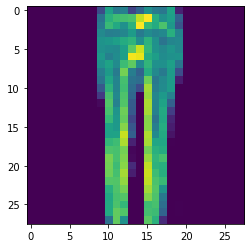

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 456

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f"LABEL: {training_labels[index]}")
print(f"  \nIMAGE PIXEL ARRAY: \n {training_images[index]}")

# Visualize the image
plt.imshow(training_images[index])

In [28]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [29]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:



```
if x > 0:
  return x

else:
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. 

In [30]:
# Declare sample inputs and converts to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f"input to softmax function: {inputs.numpy()}")

# Feed the inputs to a softmax activation functiono
outputs = tf.keras.activations.softmax(inputs)
print(f"ouput of softmax function: {outputs.numpy()}")

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f"sum of ouputs: {sum}")

# Get index with highest value
prediction = np.argmax(outputs)
print(f"class with highest probability: {prediction}")

input to softmax function: [[1. 3. 4. 2.]]
ouput of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of ouputs: 1.0
class with highest probability: 2


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4758 - accuracy: 0.8303
Epoch 2/5
1125/1875 [=================>............] - ETA: 3s - loss: 0.3684 - accuracy: 0.8657

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

In [ ]:
classification = model.predict(test_images)
print(classification[0])

In [ ]:
print(test_labels[0])